Insurance Cost Prediction
Linear Regression Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cost_dataset = pd.read_csv("./insurance.csv")
cost_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
cost_dataset.shape

(1338, 7)

In [4]:
cost_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
cost_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
cost_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
cost_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Three Categorical Columns 
- Sex
- Smoker
- Region

<Figure size 1000x1000 with 0 Axes>

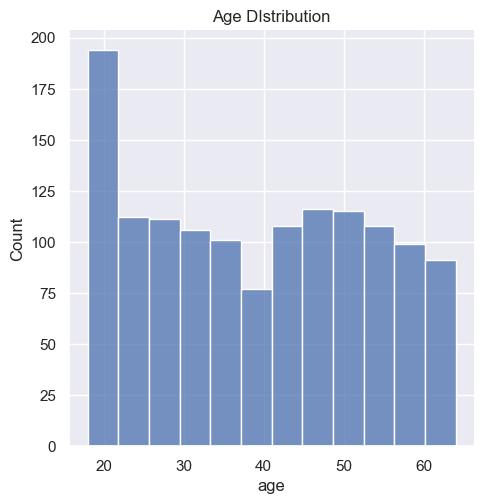

In [8]:
# Distribution of age Value
sns.set()
plt.figure(figsize=(10,10))
sns.displot(cost_dataset['age'])
plt.title('Age DIstribution')
plt.show()

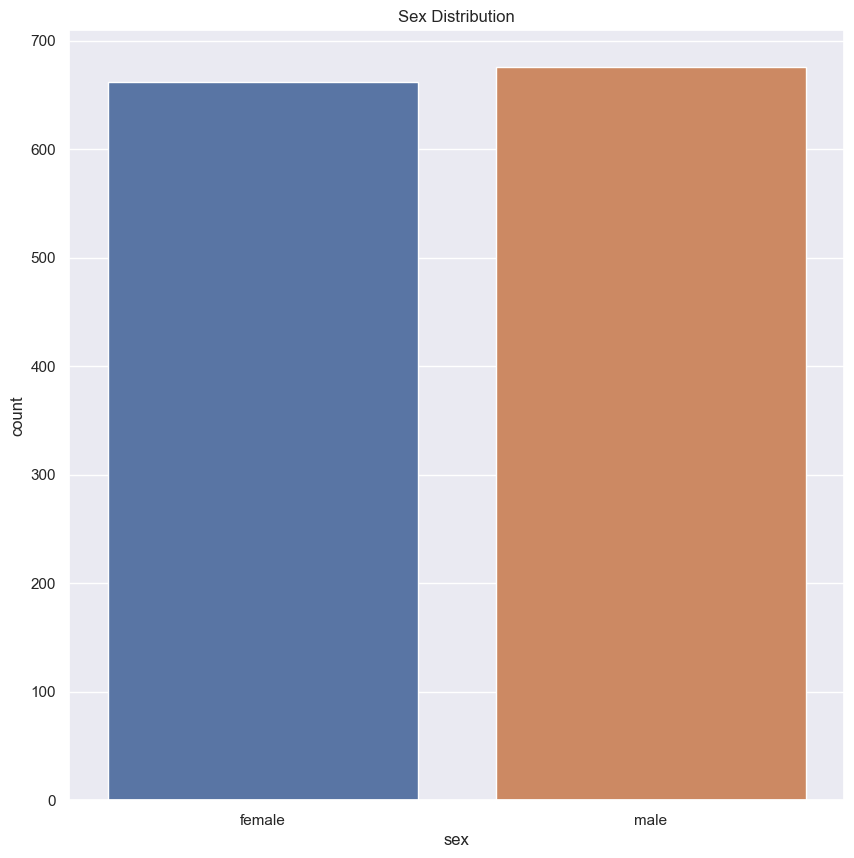

In [9]:
# Gender COlumn
plt.figure(figsize=(10,10))
sns.countplot(x = 'sex', data=cost_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
cost_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\lunat\AppData\Local\Temp\ipykernel_20320\1937751393.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cost_dataset['bmi'])


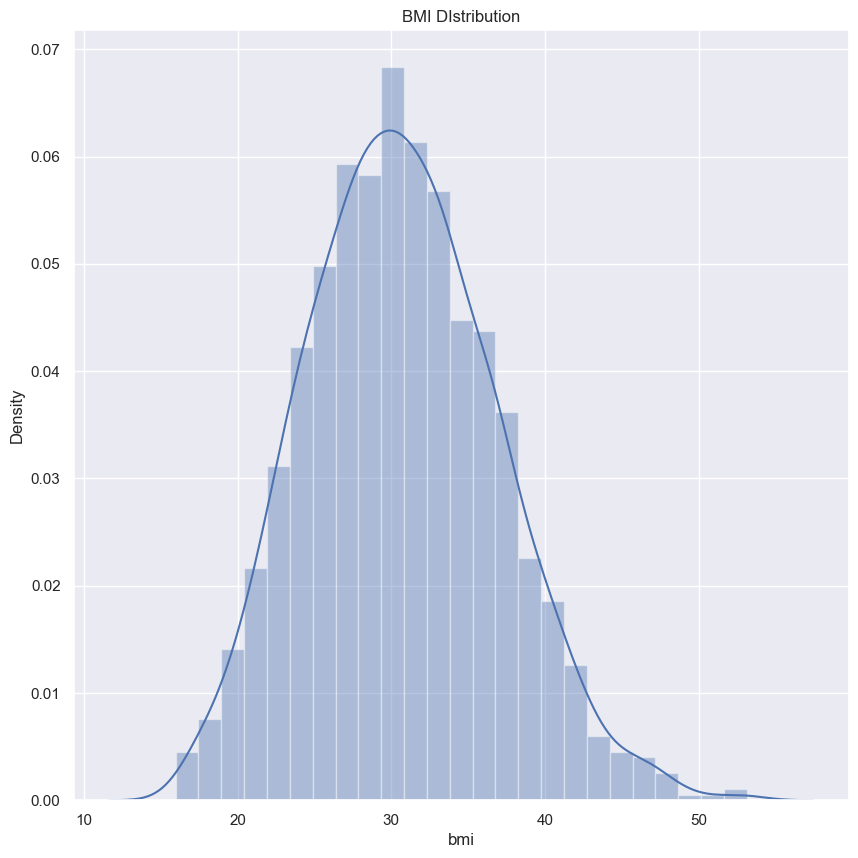

In [11]:
sns.set()
plt.figure(figsize=(10,10))
sns.distplot(cost_dataset['bmi'])
plt.title('BMI DIstribution')
plt.show()

Normal BMI range is 18.5 to 24.9
calculated using height and weight of a person
BMI - Body Mass Index


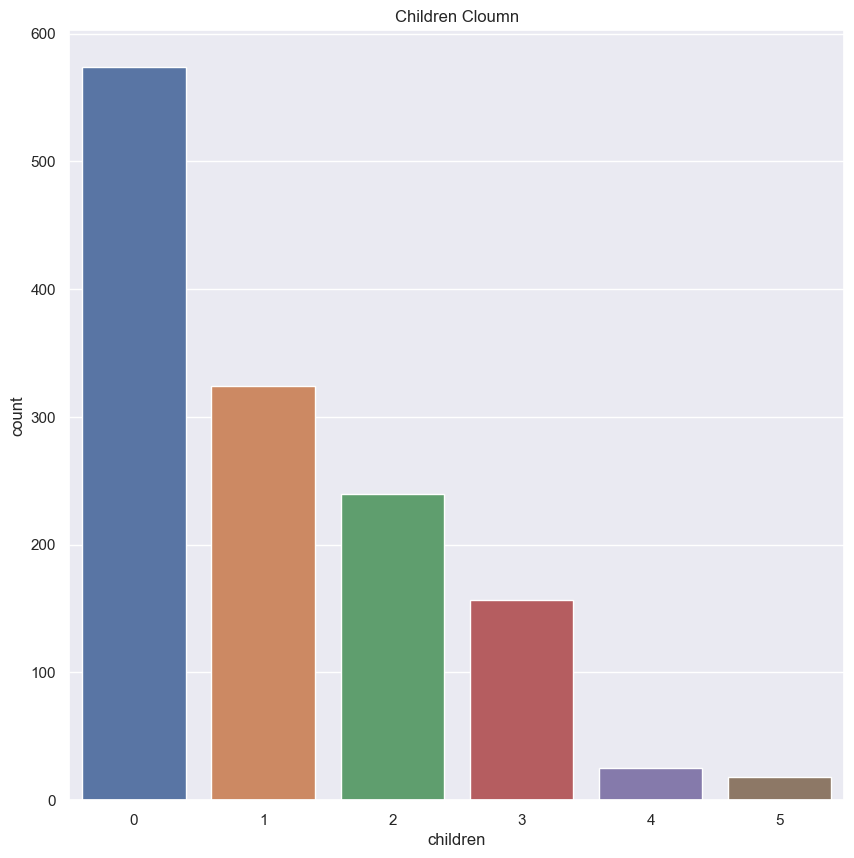

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'children', data=cost_dataset)
plt.title('Children Cloumn')
plt.show()

In [13]:
cost_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

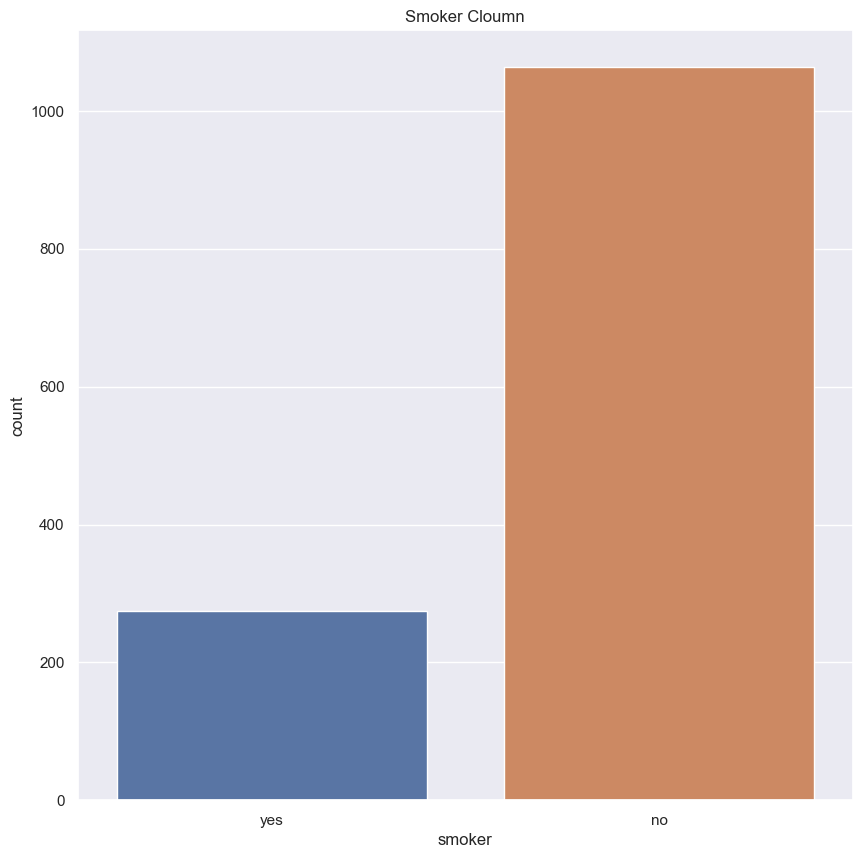

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'smoker', data=cost_dataset)
plt.title('Smoker Cloumn')
plt.show()

In [15]:
cost_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

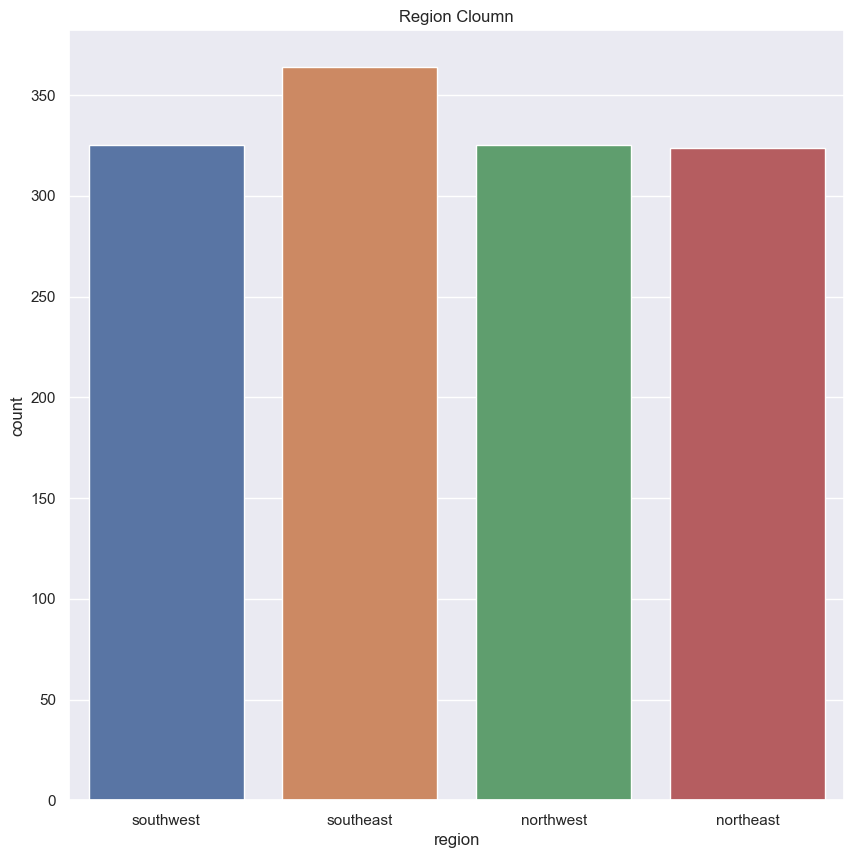

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'region', data=cost_dataset)
plt.title('Region Cloumn')
plt.show()

In [17]:
cost_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\lunat\AppData\Local\Temp\ipykernel_20320\3049130686.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cost_dataset['children'])


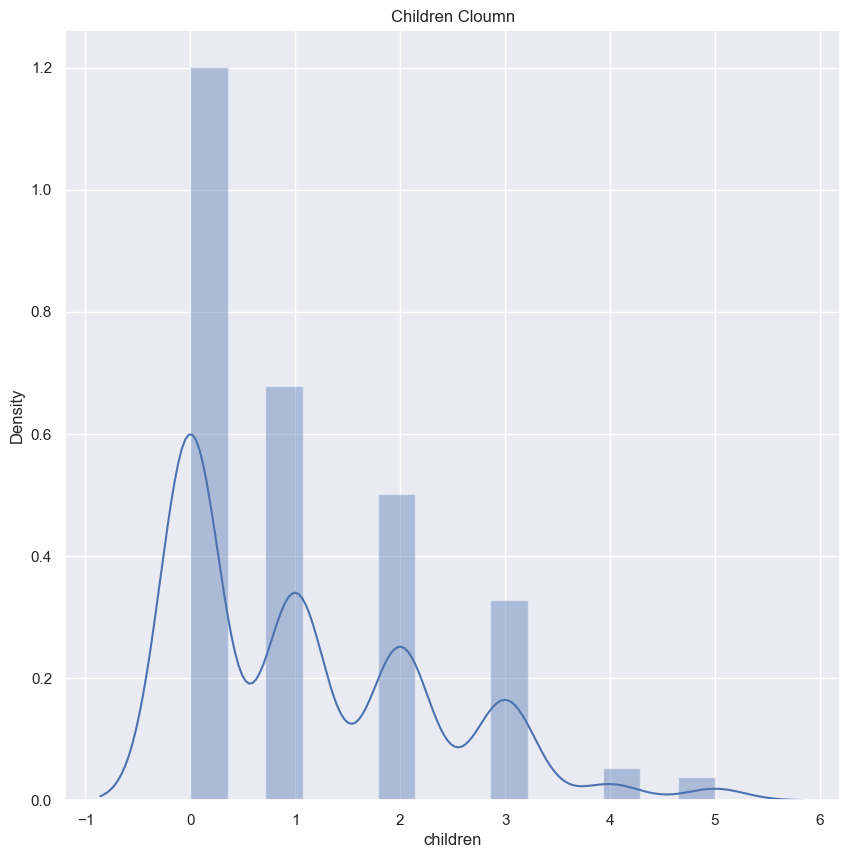

In [18]:
plt.figure(figsize=(10,10))
sns.distplot(cost_dataset['children'])
plt.title('Children Cloumn')
plt.show()

Encoding the categorical column

In [19]:
# Encoding sex column
cost_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# Encoding Smoker Column
cost_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#Encoding region column
cost_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [20]:
cost_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [21]:
# Spliting the features and target
X = cost_dataset.drop(['charges'], axis = 1)
Y = cost_dataset['charges']

In [22]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [23]:
print(X.shape)
print(Y.shape)


(1338, 6)
(1338,)


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2)

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train,Y_train)

LinearRegression()

Prediction on Training Data

In [27]:
# Accuracy Score
X_train_prediction = model.predict(X_train)

In [28]:
# R squared Value
R_squared_train = metrics.r2_score(Y_train, X_train_prediction)
print("R_Squared Value is : ", R_squared_train)

R_Squared Value is :  0.751505643411174


Prediction on Testing Data

In [29]:
X_test_prediction = model.predict(X_test)

In [30]:
# R squared Value
R_squared_test = metrics.r2_score(Y_test, X_test_prediction)
print("R_Squared Value is : ", R_squared_test)

R_Squared Value is :  0.7447273869684077


Predictive System to predict the cost 

In [32]:
input_data = (31,1,25.74,0,1,0)
input_data_numpy = np.asarray(input_data)
input_data_reshape = input_data_numpy.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

print("The Insurance cost is USD: ", prediction[0])

[3760.0805765]
The Insurance cost is USD:  3760.0805764960514


c:\Users\lunat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
